# 1. Load and Preprocess the Data
First, let's load the data and preprocess it, which includes normalizing the features and splitting the data into features and targets.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt

# Load datasets
df_train = pd.read_csv('/content/2015_2020.csv')
df_test = pd.read_csv('/content/2022_2023.csv')
df_train.drop(["DateTime", "DayOfWeek"], axis=1, inplace=True)
df_test.drop(["DateTime", "DayOfWeek"], axis=1, inplace=True)

target_column = 'KCPL'

# Separate features and targets
features_train = df_train.drop(target_column, axis=1)
target_train = df_train[target_column]
features_test = df_test.drop(target_column, axis=1)
target_test = df_test[target_column]

# Normalize features
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

# 2. Build the FNN Model
Define a function to create FNN models. This function will allow for creating models with varying structures.

In [2]:
def create_model(hidden_layers, hidden_units, learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(hidden_units, activation='relu', input_dim=features_train_scaled.shape[1]))

    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(hidden_units, activation='relu'))

    model.add(layers.Dense(1))  # No activation for regression

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])
    return model


# 3. Train and Evaluate Models
Create models with different numbers of hidden layers and units, and compare their performance.

Training model with: Hidden Layers: 2, Hidden Units: 64, Learning Rate: 0.001
Epoch 1/10
1096/1096 [==============================] - 10s 7ms/step - loss: 1113707.0000 - mean_absolute_error: 785.0175 - mean_squared_error: 1113707.0000 - val_loss: 242724.4062 - val_mean_absolute_error: 368.7677 - val_mean_squared_error: 242724.4062
Epoch 2/10
1096/1096 [==============================] - 3s 3ms/step - loss: 192666.0312 - mean_absolute_error: 335.7211 - mean_squared_error: 192666.0312 - val_loss: 163932.2656 - val_mean_absolute_error: 324.1495 - val_mean_squared_error: 163932.2656
Epoch 3/10
1096/1096 [==============================] - 3s 3ms/step - loss: 135358.5781 - mean_absolute_error: 283.6855 - mean_squared_error: 135358.5781 - val_loss: 133024.8594 - val_mean_absolute_error: 297.4972 - val_mean_squared_error: 133024.8594
Epoch 4/10
1096/1096 [==============================] - 3s 3ms/step - loss: 112852.2578 - mean_absolute_error: 261.1803 - mean_squared_error: 112852.2578 - val_los

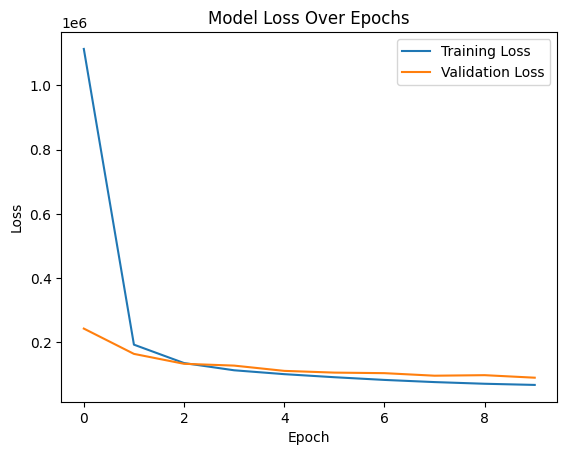

Training model with: Hidden Layers: 2, Hidden Units: 64, Learning Rate: 0.01
Epoch 1/10
1096/1096 [==============================] - 4s 3ms/step - loss: 261439.2500 - mean_absolute_error: 341.3723 - mean_squared_error: 261439.2500 - val_loss: 135832.9375 - val_mean_absolute_error: 301.3643 - val_mean_squared_error: 135832.9375
Epoch 2/10
1096/1096 [==============================] - 4s 3ms/step - loss: 96482.3984 - mean_absolute_error: 241.2177 - mean_squared_error: 96482.3984 - val_loss: 124657.7422 - val_mean_absolute_error: 285.9376 - val_mean_squared_error: 124657.7422
Epoch 3/10
1096/1096 [==============================] - 3s 3ms/step - loss: 92975.6250 - mean_absolute_error: 236.2881 - mean_squared_error: 92975.6250 - val_loss: 171433.2812 - val_mean_absolute_error: 346.2019 - val_mean_squared_error: 171433.2812
Epoch 4/10
1096/1096 [==============================] - 3s 3ms/step - loss: 87741.6406 - mean_absolute_error: 229.0938 - mean_squared_error: 87741.6406 - val_loss: 165116.

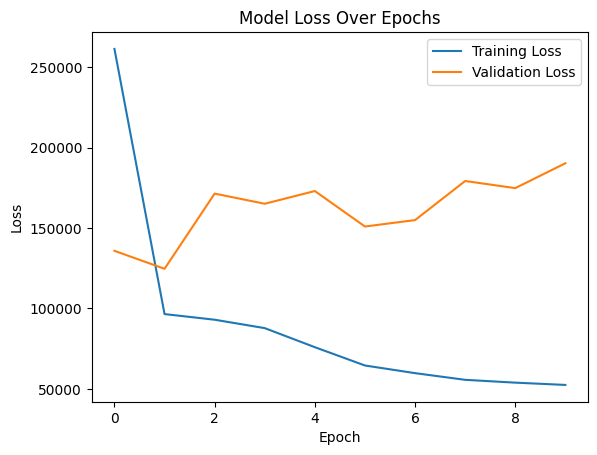

Training model with: Hidden Layers: 2, Hidden Units: 128, Learning Rate: 0.001
Epoch 1/10
1096/1096 [==============================] - 4s 3ms/step - loss: 770051.1250 - mean_absolute_error: 616.9058 - mean_squared_error: 770051.1250 - val_loss: 182769.2031 - val_mean_absolute_error: 340.2509 - val_mean_squared_error: 182769.2031
Epoch 2/10
1096/1096 [==============================] - 3s 3ms/step - loss: 136597.9688 - mean_absolute_error: 285.2100 - mean_squared_error: 136597.9688 - val_loss: 139105.6094 - val_mean_absolute_error: 306.9586 - val_mean_squared_error: 139105.6094
Epoch 3/10
1096/1096 [==============================] - 7s 7ms/step - loss: 104834.5781 - mean_absolute_error: 251.9308 - mean_squared_error: 104834.5781 - val_loss: 110920.1953 - val_mean_absolute_error: 268.7709 - val_mean_squared_error: 110920.1953
Epoch 4/10
1096/1096 [==============================] - 3s 3ms/step - loss: 88561.8438 - mean_absolute_error: 229.8788 - mean_squared_error: 88561.8438 - val_loss: 1

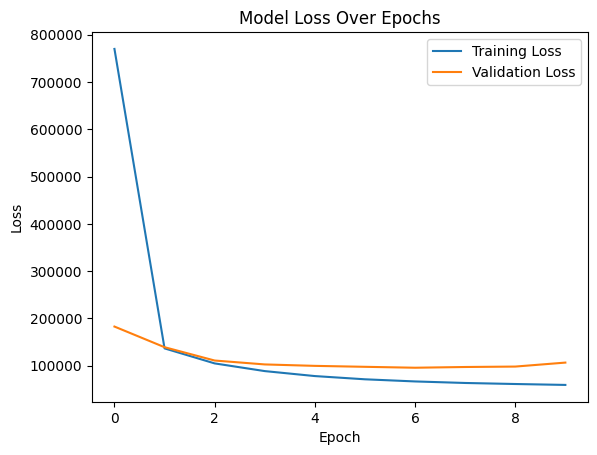

Training model with: Hidden Layers: 2, Hidden Units: 128, Learning Rate: 0.01
Epoch 1/10
1096/1096 [==============================] - 4s 3ms/step - loss: 209450.2969 - mean_absolute_error: 312.5670 - mean_squared_error: 209450.2969 - val_loss: 110504.8750 - val_mean_absolute_error: 266.7977 - val_mean_squared_error: 110504.8750
Epoch 2/10
1096/1096 [==============================] - 3s 3ms/step - loss: 95361.4219 - mean_absolute_error: 238.6954 - mean_squared_error: 95361.4219 - val_loss: 198658.5781 - val_mean_absolute_error: 374.2151 - val_mean_squared_error: 198658.5781
Epoch 3/10
1096/1096 [==============================] - 4s 4ms/step - loss: 81917.4062 - mean_absolute_error: 218.7185 - mean_squared_error: 81917.4062 - val_loss: 138466.9688 - val_mean_absolute_error: 308.4066 - val_mean_squared_error: 138466.9688
Epoch 4/10
1096/1096 [==============================] - 3s 3ms/step - loss: 66974.5938 - mean_absolute_error: 197.0144 - mean_squared_error: 66974.5938 - val_loss: 155512

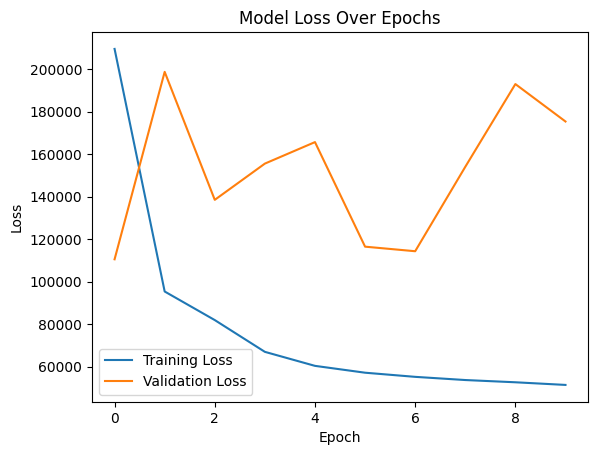

Training model with: Hidden Layers: 3, Hidden Units: 64, Learning Rate: 0.001
Epoch 1/10
1096/1096 [==============================] - 4s 3ms/step - loss: 557816.2500 - mean_absolute_error: 498.2206 - mean_squared_error: 557816.2500 - val_loss: 149203.7656 - val_mean_absolute_error: 318.0874 - val_mean_squared_error: 149203.7656
Epoch 2/10
1096/1096 [==============================] - 4s 3ms/step - loss: 113587.5312 - mean_absolute_error: 262.7282 - mean_squared_error: 113587.5312 - val_loss: 121551.3047 - val_mean_absolute_error: 281.7600 - val_mean_squared_error: 121551.3047
Epoch 3/10
1096/1096 [==============================] - 3s 3ms/step - loss: 101319.8594 - mean_absolute_error: 247.6749 - mean_squared_error: 101319.8594 - val_loss: 126997.0781 - val_mean_absolute_error: 290.6654 - val_mean_squared_error: 126997.0781
Epoch 4/10
1096/1096 [==============================] - 3s 3ms/step - loss: 96589.1797 - mean_absolute_error: 241.2017 - mean_squared_error: 96589.1797 - val_loss: 12

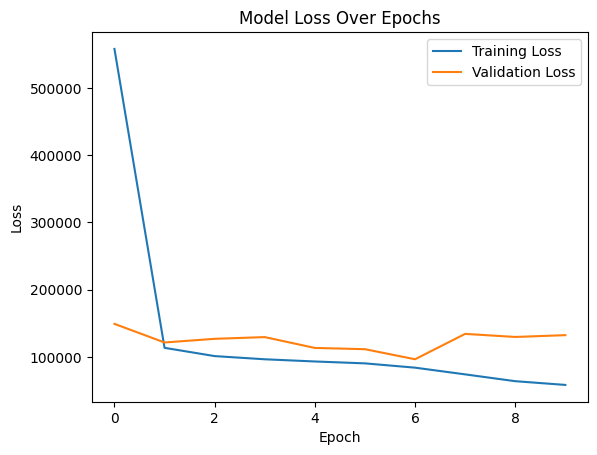

Training model with: Hidden Layers: 3, Hidden Units: 64, Learning Rate: 0.01
Epoch 1/10
1096/1096 [==============================] - 5s 4ms/step - loss: 191389.4844 - mean_absolute_error: 301.2141 - mean_squared_error: 191389.4844 - val_loss: 160961.1719 - val_mean_absolute_error: 330.9662 - val_mean_squared_error: 160961.1719
Epoch 2/10
1096/1096 [==============================] - 4s 3ms/step - loss: 80622.9297 - mean_absolute_error: 216.7902 - mean_squared_error: 80622.9297 - val_loss: 139263.4531 - val_mean_absolute_error: 309.8931 - val_mean_squared_error: 139263.4531
Epoch 3/10
1096/1096 [==============================] - 3s 3ms/step - loss: 61694.9922 - mean_absolute_error: 188.8603 - mean_squared_error: 61694.9922 - val_loss: 153241.1562 - val_mean_absolute_error: 318.9923 - val_mean_squared_error: 153241.1562
Epoch 4/10
1096/1096 [==============================] - 3s 3ms/step - loss: 57405.1445 - mean_absolute_error: 182.1138 - mean_squared_error: 57405.1445 - val_loss: 157804.

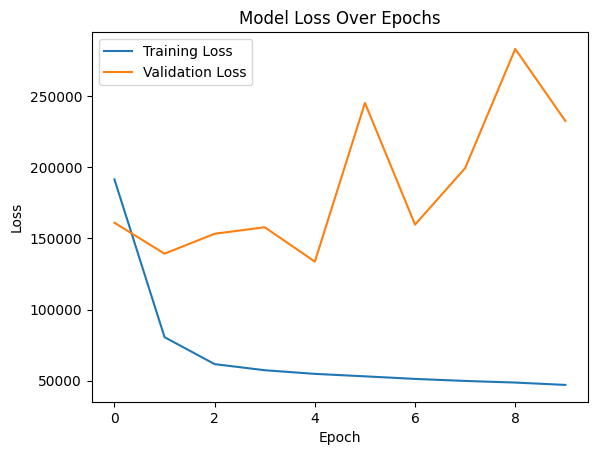

Training model with: Hidden Layers: 3, Hidden Units: 128, Learning Rate: 0.001
Epoch 1/10
1096/1096 [==============================] - 6s 5ms/step - loss: 406821.5312 - mean_absolute_error: 416.2344 - mean_squared_error: 406821.5312 - val_loss: 150348.3281 - val_mean_absolute_error: 318.5283 - val_mean_squared_error: 150348.3281
Epoch 2/10
1096/1096 [==============================] - 4s 3ms/step - loss: 97185.6094 - mean_absolute_error: 242.4837 - mean_squared_error: 97185.6094 - val_loss: 142527.1250 - val_mean_absolute_error: 311.0370 - val_mean_squared_error: 142527.1250
Epoch 3/10
1096/1096 [==============================] - 4s 3ms/step - loss: 76456.2656 - mean_absolute_error: 213.4122 - mean_squared_error: 76456.2656 - val_loss: 106011.3516 - val_mean_absolute_error: 264.3119 - val_mean_squared_error: 106011.3516
Epoch 4/10
1096/1096 [==============================] - 4s 4ms/step - loss: 65285.1719 - mean_absolute_error: 195.6128 - mean_squared_error: 65285.1719 - val_loss: 16160

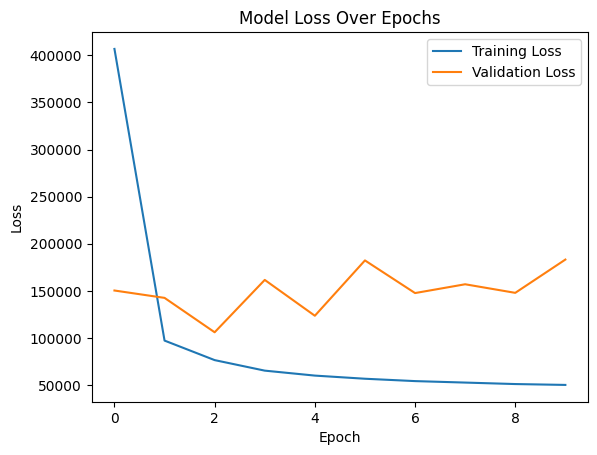

Training model with: Hidden Layers: 3, Hidden Units: 128, Learning Rate: 0.01
Epoch 1/10
1096/1096 [==============================] - 5s 4ms/step - loss: 158172.3594 - mean_absolute_error: 281.1279 - mean_squared_error: 158172.3594 - val_loss: 94108.1250 - val_mean_absolute_error: 243.6777 - val_mean_squared_error: 94108.1250
Epoch 2/10
1096/1096 [==============================] - 4s 3ms/step - loss: 70979.3516 - mean_absolute_error: 203.9885 - mean_squared_error: 70979.3516 - val_loss: 203209.5312 - val_mean_absolute_error: 378.9796 - val_mean_squared_error: 203209.5312
Epoch 3/10
1096/1096 [==============================] - 4s 3ms/step - loss: 62785.2812 - mean_absolute_error: 191.7401 - mean_squared_error: 62785.2812 - val_loss: 153284.8438 - val_mean_absolute_error: 317.5269 - val_mean_squared_error: 153284.8438
Epoch 4/10
1096/1096 [==============================] - 5s 4ms/step - loss: 56793.7656 - mean_absolute_error: 181.5969 - mean_squared_error: 56793.7656 - val_loss: 193671.8

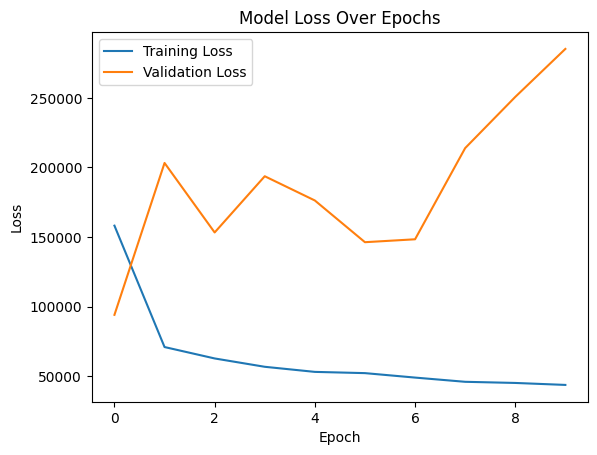

In [4]:
def train_and_evaluate_models(features_train_scaled, target_train, features_test_scaled, target_test):
    hidden_layers_list = [2, 3]  # Example: Test models with 2 and 3 hidden layers
    hidden_units_list = [64, 128]  # Example: Test models with 64 and 128 units per layer
    learning_rate_list = [0.001, 0.01]  # Example: Test models with different learning rates

    for hidden_layers in hidden_layers_list:
        for hidden_units in hidden_units_list:
            for learning_rate in learning_rate_list:
                print(f"Training model with: Hidden Layers: {hidden_layers}, Hidden Units: {hidden_units}, Learning Rate: {learning_rate}")
                model = create_model(hidden_layers, hidden_units, learning_rate)
                history = model.fit(features_train_scaled, target_train, epochs=10, batch_size=32, validation_split=0.2)

                # Evaluate the model
                train_loss, train_mae, train_mse = model.evaluate(features_train_scaled, target_train, batch_size=32)
                test_loss, test_mae, test_mse = model.evaluate(features_test_scaled, target_test, batch_size=32)

                print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
                print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

                # Plot loss over epochs
                plt.plot(history.history['loss'], label='Training Loss')
                plt.plot(history.history['val_loss'], label='Validation Loss')
                plt.title('Model Loss Over Epochs')
                plt.ylabel('Loss')
                plt.xlabel('Epoch')
                plt.legend()
                plt.show()

# Train and evaluate models
train_and_evaluate_models(features_train_scaled, target_train, features_test_scaled, target_test)

Model Configurations:
1. Hidden Layers: 2, Hidden Units: 64, Learning Rate: 0.001
Train MSE: 70393.60, Test MSE: 148692.41
Train MAE: 204.51, Test MAE: 317.94

2. Hidden Layers: 2, Hidden Units: 64, Learning Rate: 0.01
Train MSE: 78216.48, Test MSE: 995085.94
Train MAE: 208.90, Test MAE: 917.96

3. Hidden Layers: 2, Hidden Units: 128, Learning Rate: 0.001
Train MSE: 67676.79, Test MSE: 371600.22
Train MAE: 198.78, Test MAE: 532.03

4. Hidden Layers: 2, Hidden Units: 128, Learning Rate: 0.01
Train MSE: 75399.75, Test MSE: 651563.25
Train MAE: 210.45, Test MAE: 727.60

5. Hidden Layers: 3, Hidden Units: 64, Learning Rate: 0.001
Train MSE: 71504.30, Test MSE: 669399.88
Train MAE: 204.84, Test MAE: 746.32

6. Hidden Layers: 3, Hidden Units: 64, Learning Rate: 0.01
Train MSE: 81707.80, Test MSE: 1450732.62
Train MAE: 206.30, Test MAE: 1093.76

7. Hidden Layers: 3, Hidden Units: 128, Learning Rate: 0.001
Train MSE: 75820.61, Test MSE: 1437917.13
Train MAE: 206.23, Test MAE: 1092.04

8. Hidden Layers: 3, Hidden Units: 128, Learning Rate: 0.01
Train MSE: 101561.28, Test MSE: 2063874.5
Train MAE: 242.06, Test MAE: 1303.84

## Observations

Hidden Layers and Units: Increasing the number of hidden units or layers doesn't necessarily improve performance. There's no consistent pattern that more hidden layers or units always result in better metrics.

Learning Rate: Higher learning rates (0.01) seem to cause more erratic behavior, possibly leading to overfitting, as evidenced by higher test MSE and MAE compared to lower learning rates (0.001).

Overfitting: Some configurations display a significant difference between training and testing metrics, indicating overfitting. For example, configurations with higher test MSE and MAE compared to training metrics are prone to overfitting.

Best Performances: Configurations 3 (2 hidden layers, 128 units, learning rate 0.001) and 4 (2 hidden layers, 128 units, learning rate 0.01) seem to perform relatively better than others, considering the trade-off between training and testing metrics.

## Considering
1. Experiment with Lower Learning Rates: Try decreasing the learning rates further to stabilize training and possibly improve generalization.

2. Regularization Techniques: Implement regularization techniques like dropout or L2 regularization to prevent overfitting, especially with deeper architectures.

3. Model Complexity: Simplify the model by reducing the number of hidden units or layers to prevent overfitting, especially if the dataset is not large enough to support complex models.